In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def extract(filename, label='Arousal', show_mean=True):
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()

    if show_mean:
        all_mean = re.search(r"All Subjects Mean Accuracy: ([0-9.]+) ± ([0-9.]+)", text)
        all_mean_accuracy = float(all_mean.group(1))
        all_mean_std = float(all_mean.group(2))
        print(f"[{label}] All Subjects Mean Accuracy: {all_mean_accuracy:.4f} ± {all_mean_std:.4f}")


    pattern = r"Subject s(\d+): Mean Accuracy: ([0-9.]+) \| std: ([0-9.]+)"
    matches = re.findall(pattern, text)

    ids = []
    accs = []
    stds = []

    for idx, acc, std in matches:
        ids.append(f"s{idx.zfill(2)}")
        accs.append(float(acc))
        stds.append(float(std))

    return ids, accs, stds

In [3]:

def plot_histogram(sub_idx, accs, stds, label='Arousal'):
    x = range(len(sub_idx))

    plt.figure(figsize=(12, 6))
    plt.bar(x, accs, yerr=stds, capsize=5,
            label=label, color='skyblue', alpha=0.8)
    
    plt.xticks(x, sub_idx, rotation=45)
    plt.xlabel("Subject")
    plt.ylabel("Mean Accuracy")
    plt.title("Mean Accuracy")
    plt.ylim(0, 1.0)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_comparison(sub_idx, acc1, std1, acc2, std2, label1='Arousal', label2='Valence'):
    x, width = range(len(sub_idx)), 0.35

    plt.figure(figsize=(15, 6))
    plt.bar([i - width/2 for i in x], acc1, yerr=std1, capsize=5, width=width,
            label=label1, color='steelblue', alpha=0.85)
    plt.bar([i + width/2 for i in x], acc2, yerr=std2, capsize=5, width=width,
            label=label2, color='orange', alpha=0.85)

    plt.xticks(x, sub_idx, rotation=45)
    plt.xlabel("Subject")
    plt.ylabel("Mean Accuracy")
    plt.title(f"{label1} vs {label2} Mean Accuracy")
    plt.ylim(0.2, 1.0)
    plt.yticks(np.arange(0.2, 1.01, 0.1))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()




[Arousal] All Subjects Mean Accuracy: 0.9422 ± 0.0395
[Valence] All Subjects Mean Accuracy: 0.9253 ± 0.0532


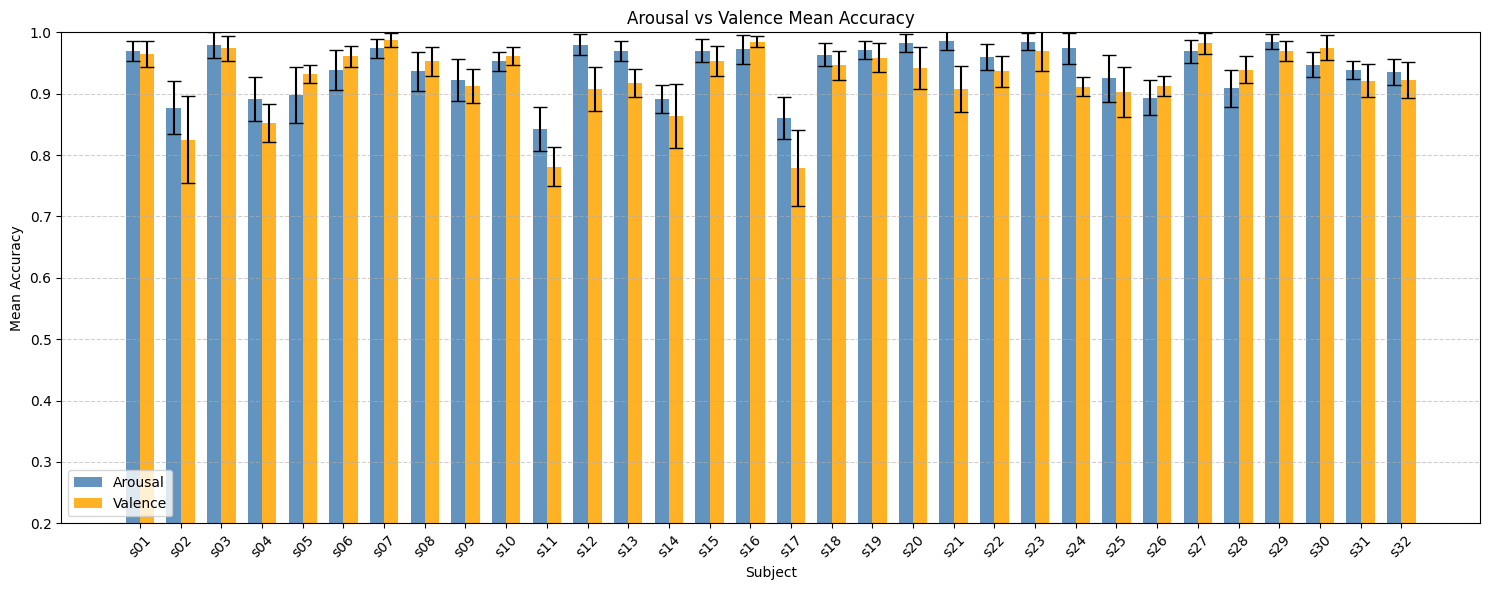

In [ ]:
"""
KFolds: 10, Random state: 42
Epochs: 300, Batch size: 10, Learning rate: 0.0001
"""
file_arousal = r'Result\ACRNN_DEAP_10folds_Arousal_2025-06-21_12-51-29_result.txt'
file_valence = r'Result\ACRNN_DEAP_10folds_Valence_2025-06-23_04-00-47_result.txt'

subject_idx_a, acc_a, std_a = extract(file_arousal, label='Arousal')
subject_idx_v, acc_v, std_v = extract(file_valence, label='Valence')

plot_comparison(subject_idx_a, acc_a, std_a, acc_v, std_v, label1='Arousal', label2='Valence')


[Arousal] All Subjects Mean Accuracy: 0.9306 ± 0.0429
[Valence] All Subjects Mean Accuracy: 0.9134 ± 0.0529


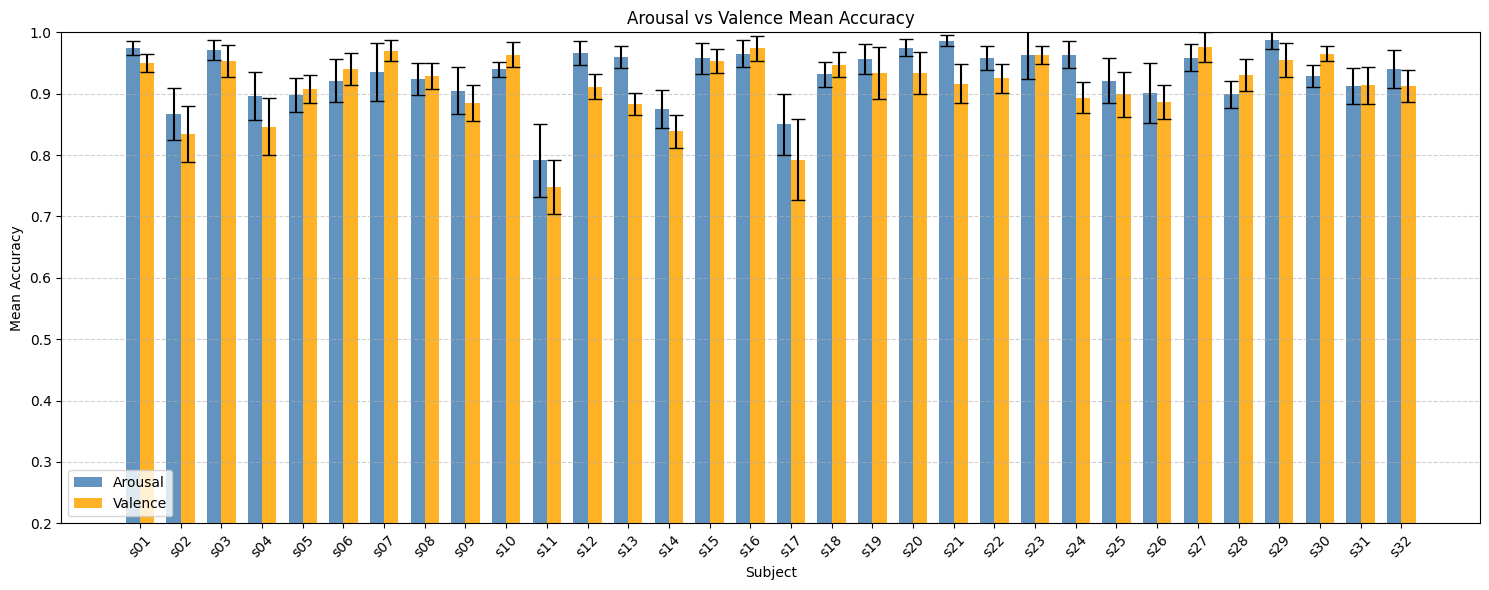

In [ ]:
"""
KFolds: 10, Random state: 42
Epochs: 200, Batch size: 10, Learning rate: 0.0001
"""
file_arousal = r'Result/ACRNN_DEAP_10folds_Arousal_2025-06-27_06-09-27_result.txt'
file_valence = r'Result/ACRNN_DEAP_10folds_Valence_2025-06-27_06-08-52_result.txt'

subject_idx_a, acc_a, std_a = extract(file_arousal, label='Arousal')
subject_idx_v, acc_v, std_v = extract(file_valence, label='Valence')

plot_comparison(subject_idx_a, acc_a, std_a, acc_v, std_v, label1='Arousal', label2='Valence')
